<h1>Exploratory Data Analysis - Customer Loans in Finance Project<h1>

<h2>Imports:<h2>

In [1]:
import db_connect
import db_transform
import db_info
import db_frame_transform
import db_plotter
import db_analysis

<h2>Setup:<h2>

Connecting to the database:

In [2]:
db_conn = db_connect.RDSDatabaseConnector()
db_conn.RDSConnection()
db_conn.RDSExtract()

Save data to a local file:

In [ ]:
db_conn.RDSSaveToCSV()

<h2>Converting Data:<h2>

We convert any datatypes that are in the wrong format or are better suited to a differnt datatype to the required status:

In [3]:
db_conv = db_transform.DataTransform(db_conn.loan_payments)
db_conv.convert_to_datetime(['issue_date','last_payment_date','next_payment_date','earliest_credit_line'])
db_conv.convert_to_int()
db_conv.convert_int_to_flt()

<h2>Dataframe Info:<h2>

In [ ]:
db_inf = db_info.DataFrameInfo(db_conv.df)

We can check the measures of central tendency (mean, median and standard deviation):

In [ ]:
db_inf.get_mean()

In [ ]:
db_inf.get_median()

In [ ]:
db_inf.get_standard_deviation()

We can check what data types each coulmn are:

In [ ]:
db_inf.check_datatypes()

We can check infomation about the values of the dataframe (shape, the number of null values and the number of distinct values):

In [ ]:
db_inf.get_shape()

In [ ]:
db_inf.get_distinct_values()

The null values are represented as a percent:

In [ ]:
db_inf.get_null_values()

<h2>Transforming the Data:<h2>

Here we have the transformation of the data including skewness and correlation as well as the plots:

In [4]:
db_trans = db_frame_transform.DataFrameTransform(db_conv.df)

In [ ]:
db_plot = db_plotter.Plotter(db_trans.df)

Plot of the frame before any transformation:

In [ ]:
db_plot.plot_frame()

<h3>Null Values:<h3>

We remove columns with null values over a threshold, here we use *50%*:

In [5]:
db_trans.null_values()

Here is the plot of the data after we have removed the large sums of null values:

In [ ]:
db_plot.reset_frame(db_trans.df)
db_plot.plot_frame()

We then have to remove the rest of the null values, so we impute them with a measure of central tendancy.\
Here we use the *mean* and the *mode* as they fit the best in the given columns:

In [6]:
db_trans.data_impute(['funded_amount','term', 'int_rate','collections_12_mths_ex_med'], 'mean')
db_trans.data_impute(['employment_length', 'last_payment_date', 'last_credit_pull_date'], 'mode')

Here we have the plot of the data with no null values:

In [ ]:
db_plot.reset_frame(db_trans.df)
db_plot.plot_frame()

<h3>Skewness:<h3>

Here is a plot of the data before using the correction method:

In [ ]:
db_plot.skewness()

We use the *PowerTransformer()* method from *sklearn* which uses the *yeo-johnnson* correction in this case:

In [7]:
db_trans.correct_skew()
db_new_plot = db_plotter.Plotter(db_trans.newdf)

Here is a plot of the data after the corrrection:

In [ ]:
db_new_plot.skewness()

<h3>Correlation:<h3>

Here we have a correlation matrix of the data:

In [ ]:
db_new_plot.corr_matrix()

We can see that many columns are highly positivly correlated *(over 0.9)* but no columns are highly negativly correlated.\
So we can decide on what columns to drop due to this:\
- *'member_id'* due its correlation with *'id'* 
- *'total_payment_inv'* due to its correlation with *'total_payment'* and *'total_rec_prncp'*
- *'funded_amount_inv'* due to its correlation with *'loan_amount'*, *'funded_amount'* and *'instalment'*
- *'funded_amount'* due to its correlation with *'loan_amount'*
- *'out_prncp_inv'* due to its *perfect* correlation with *'out_prncp'*
- *'instalment'* due to its correlation with *'loan_amount'*
- *'recoveries'* due to its correlation with *'collection_recovery_fee'*
- *'total_rec_prncp'* due to its correlation with *'total_payment'* and *'total_payment_inv'*

In [8]:
db_trans.correlation()

Here we have the correlation matrix after the colunms have been removed:

In [ ]:
db_new_plot.reset_frame(db_trans.newdf)
db_new_plot.corr_matrix()

<h2>Analysis of the Data:<h2>

In [9]:
db_ana = db_analysis.DataAnalysis(db_trans.df)

Here we have a plot of the state of the loans, we have *entry number* on the *x axis* and *percent paid off* on the *y axis*:

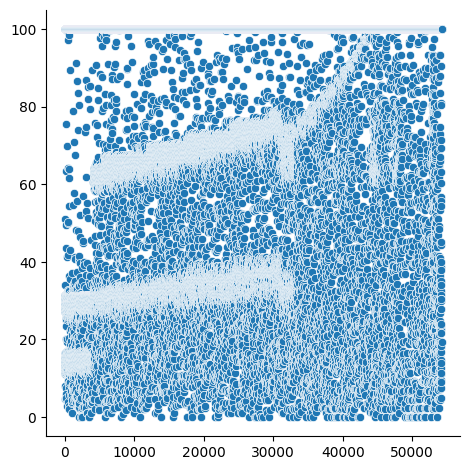

In [10]:
db_ana.state_of_loans()

Plot for the expected amount paid off in six months:

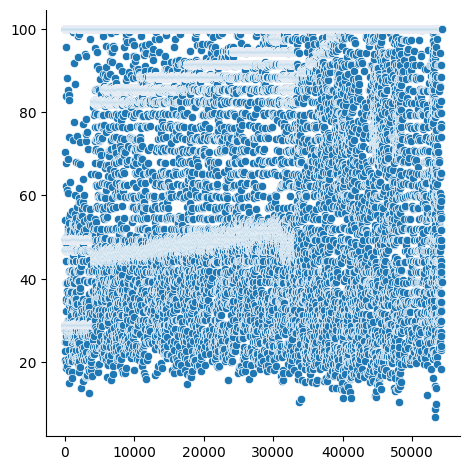

In [11]:
db_ana.six_months()

Here we have the percent of loans that are charged off, the amount paid back and the total loss from the charged off loans:

In [12]:
db_ana.loan_loss()

The percent that has been charged off is 10.27%, and the amount paid back is 19981382.54 out of 76359400.0
The amount that the company lost due to these charged off loans is, 66135382.64


Here we have the potential loss if the late loans are charged off:

In [13]:
db_ana.possible_loss()

The percentage of users that have a late payment is 1.26%, the projected loss if said customers were to not finish their payment is 6024730.62
and the percent of loss for all late loans if they were charged off, as well as all currently charged off loans is 4.78%


We then have a look at columns that would make sense to have an impact on the chance of a loan being late or charged off.\
The columns in question are *'grade_level'*, *'purpose'* and *'home_ownership'*:

In [14]:
db_ana.indicator_of_loss()

We can see that the lower the grade level of a loan the more likely it is to affect if the loan is charged off or late:
 {'A': 4.6, 'B': 8.96, 'C': 12.32, 'D': 16.48, 'E': 19.72, 'F': 23.26, 'G': 23.22}
The purpose of the loan seems to not have too big of an impact on the likelihood of the loan being a loss:
 {'credit_card': 9.15, 'debt_consolidation': 11.84, 'home_improvement': 9.55, 'small_business': 23.86, 'renewable_energy': 15.19, 'major_purchase': 10.48, 'other': 14.12, 'moving': 14.91, 'car': 9.3, 'medical': 13.63, 'house': 12.15, 'vacation': 12.19, 'wedding': 8.35, 'educational': 13.93} , execpt if the purpose is small business.
The home ownership has so imapct on the chance of the loan being charged off or late:
 {'MORTGAGE': 10.2, 'RENT': 12.97, 'OWN': 12.34, 'OTHER': 14.29, 'NONE': 0.0}
